Query 1:
<br> 
SELECT 
FROM_ADDRESS,
TO_ADDRESS,
TO_ADDRESS_NAME,
BLOCK_TIMESTAMP,
VALUE,
GAS,
GAS_USED,
TX_HASH,
FUNCTION_NAME,
BLOCK_NUMBER as Block_Height ,
TX_POSITION,
TRACE_INDEX
FROM ethereum.core.ez_decoded_traces
WHERE  BLOCK_TIMESTAMP between '2025-01-01' and '2025-01-15'

In [2]:
# 📊 Data Handling
import pandas as pd
import numpy as np

# 📈 Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# ⚙️ Preprocessing & Scaling
from datetime import timedelta
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

# 📈 Analysis
import scipy.stats as stats
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
  
# 🧠 Modeling
from sklearn.cluster import KMeans, DBSCAN
import hdbscan
from sklearn.metrics import silhouette_score

In [3]:
d1 = pd.read_csv('01.csv',on_bad_lines='skip')
d2 = pd.read_csv('02.csv',on_bad_lines='skip')
d3 = pd.read_csv('03.csv',on_bad_lines='skip')
d4 = pd.read_csv('04.csv',on_bad_lines='skip')
d5 = pd.read_csv('05.csv',on_bad_lines='skip')
d6 = pd.read_csv('06.csv',on_bad_lines='skip')
df = pd.concat([d1,d2,d3,d4,d5,d6])

In [4]:
df['BLOCK_TIMESTAMP'] = pd.to_datetime(df['BLOCK_TIMESTAMP'])
df.head()

,FROM_ADDRESS,TO_ADDRESS,TO_ADDRESS_NAME,BLOCK_TIMESTAMP,VALUE,GAS,GAS_USED,TX_HASH,FUNCTION_NAME,BLOCK_HEIGHT,TX_POSITION,TRACE_INDEX
0,0x9d58779365b067d5d3fcc6e92d237acd06f1e6a1,0x78b8227c1b93a5dbefa2623cee1eeba1b18a7760,NaN,2025-01-04 21:04:59,0.0,167602.0,7403.0,0xa02b86e44241888f28e1cb24b867d2772d80968be7b3...,owner,21553686.0,141.0,4.0
1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,0x43506849d7c04f9138d1a2050bbf3a0c054402dd,NaN,2025-01-04 21:11:59,0.0,64306.0,9463.0,0x9e0cb71945a4d7928242a9fe37f9e82570c2fdcf1b69...,transfer,21553721.0,8.0,15.0
2,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,2025-01-04 07:48:35,0.0,47077.0,9220.0,0xba2b481d50bc99ed18638053829cbb34ba1d05a5ded5...,withdraw,21549722.0,182.0,11.0
3,0xfdf48acef0014d47c1f60551c333cfffaf57d43d,0x06450dee7fd2fb8e39061434babcfc05599a6fb8,XEN Crypto,2025-01-04 07:00:11,0.0,7976636.0,14769.0,0x25a632434d853ec82b29b529464bbe6da875a622ea37...,claimRank,21549480.0,43.0,670.0
4,0x5141b82f5ffda4c6fe1e372978f1c5427640a190,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,Wrapped Ether,2025-01-04 07:24:59,0.0,51378.0,6062.0,0xfa383b405155fdcb0989b33c542a138d4e1a748d18fc...,transfer,21549604.0,91.0,10.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 599974 entries, 0 to 99994
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   FROM_ADDRESS     599974 non-null  object        
 1   TO_ADDRESS       599968 non-null  object        
 2   TO_ADDRESS_NAME  331696 non-null  object        
 3   BLOCK_TIMESTAMP  599968 non-null  datetime64[ns]
 4   VALUE            599968 non-null  float64       
 5   GAS              599968 non-null  float64       
 6   GAS_USED         599968 non-null  float64       
 7   TX_HASH          599968 non-null  object        
 8   FUNCTION_NAME    599968 non-null  object        
 9   BLOCK_HEIGHT     599968 non-null  float64       
 10  TX_POSITION      599968 non-null  float64       
 11  TRACE_INDEX      599968 non-null  float64       
dtypes: datetime64[ns](1), float64(6), object(5)
memory usage: 59.5+ MB


In [6]:
df.shape

(599974, 12)

# Step 01: EDA

In [7]:
df['FROM_ADDRESS'].value_counts().head(20)

0x06450dee7fd2fb8e39061434babcfc05599a6fb8    33334
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    31737
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad    22632
0x66a9893cc07d91d95644aedd05d03f95e1dba8af    16157
0x0d0e364aa7852291883c162b22d6d81f6355428f    10575
0x7a250d5630b4cf539739df2c5dacb4c659f2488d     8257
0x1111111254eeb25477b68fb85ed929f73a960582     6644
0x5141b82f5ffda4c6fe1e372978f1c5427640a190     6513
0x0a252663dbcc0b073063d6420a40319e438cfa59     5694
0x70bf6634ee8cb27d04478f184b9b8bb13e5f4710     5137
0xa7ca2c8673bcfa5a26d8ceec2887f2cc2b0db22a     4141
0x1231deb6f5749ef6ce6943a275a1d3e7486f4eae     4069
0x74de5d4fcbf63e00296fd95d33236b9794016631     3976
0x7d0ccaa3fac1e5a943c5168b6ced828691b46b36     3744
0x111111125421ca6dc452d289314280a0f8842a65     3705
0x00a0be1bbc0c99898df7e6524bf16e893c1e3bb9     3501
0x3328f7f4a1d1c57c35df56bbf0c9dcafca309c49     3342
0xa9d1e08c7793af67e9d92fe308d5697fb81d3e43     3270
0xc7bbec68d12a0d1830360f8ec58fa599ba1b0e9b     3239
0xf3de3c0d65

In [8]:
df['TO_ADDRESS'].value_counts().head(20)

0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2    93537
0x4bba9b6b49f3dfa6615f079e9d66b0aa68b04a4d    33327
0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48    31778
0x43506849d7c04f9138d1a2050bbf3a0c054402dd    31650
0xdac17f958d2ee523a2206206994597c13d831ec7    31275
0x06450dee7fd2fb8e39061434babcfc05599a6fb8    17061
0x0a252663dbcc0b073063d6420a40319e438cfa59     5812
0x000000000022d473030f116ddee9f6b43ac78ba3     4591
0x000000000004444c5dc75cb358380d2e3de08a90     4431
0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad     3976
0xbbbbbbbbbb9cc5e90e3b3af64bdaf62c37eeffcb     3640
0x7a250d5630b4cf539739df2c5dacb4c659f2488d     3236
0x0de8bf93da2f7eecb3d9169422413a9bef4ef628     3075
0x2260fac5e5542a773aa44fbcfedf7c193bc2c599     2653
0x1111111254eeb25477b68fb85ed929f73a960582     2500
0x52aa899454998be5b000ad077a46bbe360f4e497     2402
0x3c3d457f1522d3540ab3325aa5f1864e34cba9d0     2248
0x98f3c9e6e3face36baad05fe09d375ef1464288b     2210
0x7f39c581f595b53c5cb19bd0b3f8da6c935e2ca0     2202
0x1d8f8f00cf

<Axes: xlabel='BLOCK_HEIGHT'>

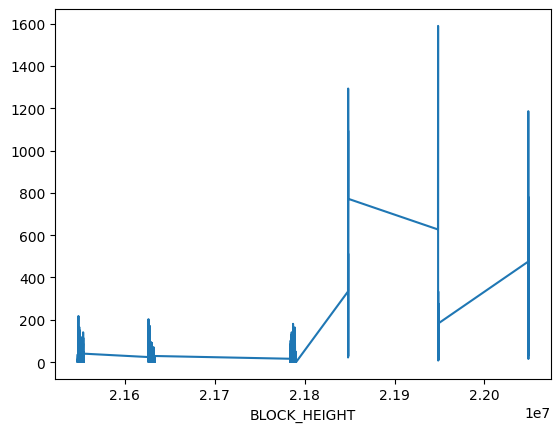

In [9]:
df.groupby('BLOCK_HEIGHT')['TX_HASH'].count().plot()

<Axes: xlabel='GAS_USED', ylabel='Count'>

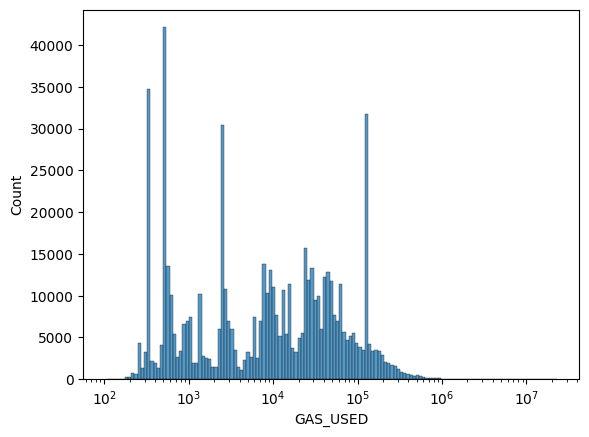

In [10]:
sns.histplot(df['GAS_USED'], log_scale=True)


<Axes: xlabel='VALUE', ylabel='Count'>

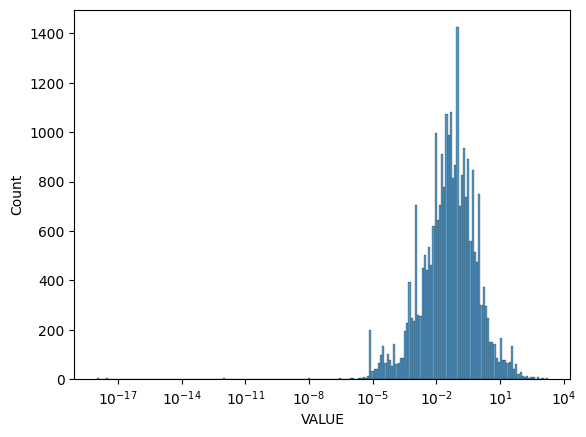

In [11]:
sns.histplot(df['VALUE'], log_scale=True)

<Axes: xlabel='GAS_USED', ylabel='Count'>

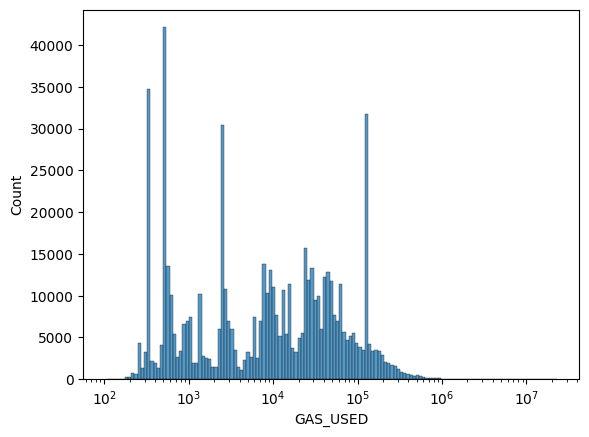

In [12]:
sns.histplot(df['GAS_USED'], log_scale=True)


<Axes: xlabel='VALUE', ylabel='Count'>

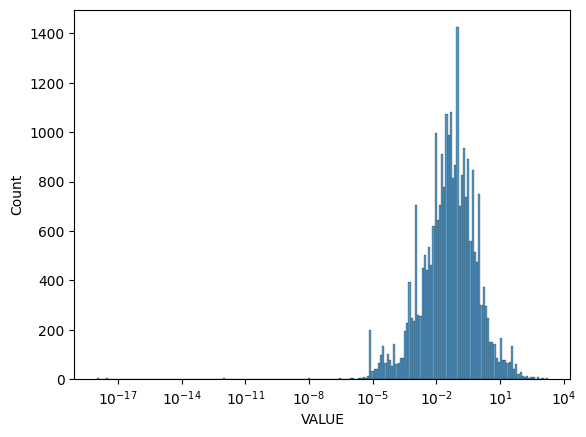

In [13]:
sns.histplot(df['VALUE'], log_scale=True)

# Step 02: Feature Engineering

## 2.1 🧩  Edge-level features

In [14]:

# لیست همه آدرس‌ها
all_addresses = pd.concat([df['FROM_ADDRESS'], df['TO_ADDRESS']]).dropna().unique()

# تعداد تراکنش‌های ارسال و دریافت برای هر آدرس
node_features = pd.DataFrame({'ADDRESS': all_addresses})

# تعداد تراکنش‌های ارسالی
node_features['NUM_TX_SENT'] = node_features['ADDRESS'].map(df['FROM_ADDRESS'].value_counts())

# تعداد تراکنش‌های دریافتی
node_features['NUM_TX_RECEIVED'] = node_features['ADDRESS'].map(df['TO_ADDRESS'].value_counts())

# مجموع ارزش ارسالی
node_features['TOTAL_VALUE_SENT'] = node_features['ADDRESS'].map(df.groupby('FROM_ADDRESS')['VALUE'].sum())

# مجموع ارزش دریافتی
node_features['TOTAL_VALUE_RECEIVED'] = node_features['ADDRESS'].map(df.groupby('TO_ADDRESS')['VALUE'].sum())

# میانگین گس استفاده شده برای ارسال
node_features['AVG_GAS_USED'] = node_features['ADDRESS'].map(df.groupby('FROM_ADDRESS')['GAS_USED'].mean())

# پر کردن مقدارهای NaN با صفر
node_features = node_features.fillna(0)

In [15]:
node_features

,ADDRESS,NUM_TX_SENT,NUM_TX_RECEIVED,TOTAL_VALUE_SENT,TOTAL_VALUE_RECEIVED,AVG_GAS_USED
0,0x9d58779365b067d5d3fcc6e92d237acd06f1e6a1,24.0,16.0,0.000000,0.000000,82563.541667
1,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,31737.0,31778.0,0.000000,0.000000,12808.469295
2,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad,22632.0,3976.0,496.958480,424.889657,20360.915562
3,0xfdf48acef0014d47c1f60551c333cfffaf57d43d,1.0,0.0,0.000000,0.000000,14769.000000
4,0x5141b82f5ffda4c6fe1e372978f1c5427640a190,6513.0,0.0,1357.284089,0.000000,25707.838323
...,...,...,...,...,...,...
87527,0x0b47e04093ee2a0b754d1b09de4da285614a8cf7,0.0,1.0,0.000000,0.000000,0.000000
87528,0x01b6eac79aa222fd8ea3fd1e5863d94d3862f127,0.0,1.0,0.000000,0.000000,0.000000
87529,0x58571484bd57a87e359e46f82dfa9d13087b24a0,0.0,1.0,0.000000,0.000000,0.000000
87530,0xa0cbe21643a224fd30f5fd629c746a0ede665299,0.0,1.0,0.000000,0.000000,0.000000


<Axes: xlabel='TOTAL_VALUE_RECEIVED', ylabel='Count'>

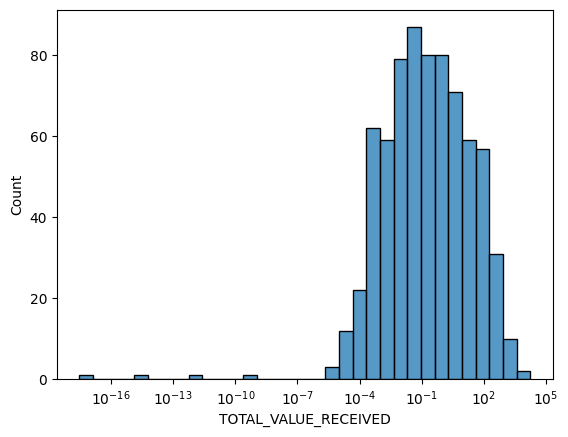

In [19]:
numeric_cols = node_features.select_dtypes(include=['float64', 'int64']).columns

# روی هر ستون عددی، امتیازدهی انجام می‌دیم
for col in numeric_cols:
    try:
        # اگر تعداد مقادیر منحصر‌به‌فرد کمتر از 10 باشه ممکنه ارور بده، بنابراین duplicates='drop'
        node_features[f"{col}_SCORE"] = pd.qcut(node_features[col].rank(method='average'), 10, labels=False, duplicates='drop') + 1
    except Exception as e:
        print(f"❌ Couldn't bin column {col}: {e}")

## 2.2  Edge-level Features 

In [16]:
# ایجاد یک ستون ترکیبی فرستنده-گیرنده
df['FROM_TO_PAIR'] = df['FROM_ADDRESS'] + '->' + df['TO_ADDRESS']

# تعداد تراکنش‌ها بین هر جفت آدرس
edge_features = df.groupby('FROM_TO_PAIR').agg(
    NUM_TXS=('TX_HASH', 'count'),
    TOTAL_VALUE=('VALUE', 'sum'),
    AVG_VALUE=('VALUE', 'mean'),
    AVG_GAS_USED=('GAS_USED', 'mean'),
    FIRST_TX_TIME=('BLOCK_TIMESTAMP', 'min'),
    LAST_TX_TIME=('BLOCK_TIMESTAMP', 'max'),
).reset_index()

# استخراج آدرس‌ها مجدد از ستون ترکیبی
edge_features['FROM_ADDRESS'] = edge_features['FROM_TO_PAIR'].str.split('->').str[0]
edge_features['TO_ADDRESS'] = edge_features['FROM_TO_PAIR'].str.split('->').str[1]

# حذف ستون ترکیبی
edge_features.drop(columns=['FROM_TO_PAIR'], inplace=True)

In [17]:
edge_features

,NUM_TXS,TOTAL_VALUE,AVG_VALUE,AVG_GAS_USED,FIRST_TX_TIME,LAST_TX_TIME,FROM_ADDRESS,TO_ADDRESS
0,1,0.000000,0.000000,43807.000000,2025-02-06 06:37:23,2025-02-06 06:37:23,0x000000000000003607fce1ac9e043a86675c5c2f,0xb47e3cd837ddf8e4c57f05d70ab865de6e193bbb
1,21,0.000000,0.000000,2517.904762,2025-01-04 01:23:59,2025-03-01 00:24:11,0x00000000000000447e69651d841bd8d104bed493,0x00000000000000447e69651d841bd8d104bed493
2,842,0.000000,0.000000,5105.680523,2025-01-04 00:18:35,2025-03-15 00:58:23,0x0000000000000068f116a894984e2db1123eb395,0x000056f7000000ece9003ca63978907a00ffd100
3,1,0.000000,0.000000,15324.000000,2025-01-15 09:58:59,2025-01-15 09:58:59,0x0000000000000068f116a894984e2db1123eb395,0x013bb688d14a14185e218208ba07bb501e367edb
4,2,0.000000,0.000000,11619.000000,2025-03-15 00:53:23,2025-03-15 00:53:23,0x0000000000000068f116a894984e2db1123eb395,0x19f1b63f4fa6ee5ebca6017e04d837483d6cdf3d
...,...,...,...,...,...,...,...,...
142151,2,3.144651,1.572325,221497.500000,2025-01-04 20:59:11,2025-01-04 21:03:23,0xfffd7fdc0610d128e36b6beabbfecf93f6550ded,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
142152,1,0.000000,0.000000,534.000000,2025-03-15 00:05:35,2025-03-15 00:05:35,0xffff5b0db46c6233f507c16ceace70187f7e5ac5,0x1d8f8f00cfa6758d7be78336684788fb0ee0fa46
142153,1,0.280000,0.280000,180656.000000,2025-01-04 11:28:59,2025-01-04 11:28:59,0xffffe9508272cff622e98665dd9516d03fd37493,0x3fc91a3afd70395cd496c647d5a6cc9d4b2b7fad
142154,6,0.000000,0.000000,31244.500000,2025-03-01 00:00:59,2025-03-01 00:11:59,0xffffffaeff0b96ea8e4f94b2253f31abdd875847,0xc011a73ee8576fb46f5e1c5751ca3b9fe0af2a6f


# Step 03: Modeling

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split


features = [
    "VALUE", "GAS_USED", "GAS", "IS_ZERO_VALUE", "VALUE_PER_GAS_USED",
    "IS_SUSPICIOUS_FUNCTION", "BLOCK_TX_COUNT", "TRACE_COUNT_IN_TX",
    "AVG_GAS_USED_BY_SENDER", "TX_SENT_COUNT", "TX_RECEIVED_COUNT", "GAS_DIFF"
]

X = df[features].fillna(0)
X_scaled = StandardScaler().fit_transform(X)


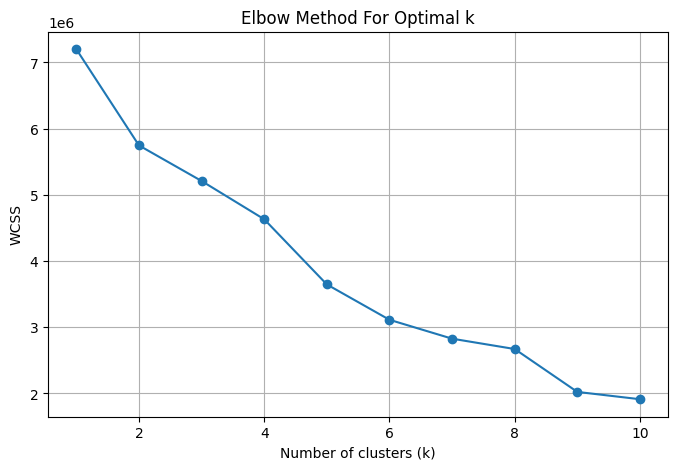

In [17]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# محاسبه WCSS برای چندین مقدار k
wcss = []
K_range = range(1, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

# رسم نمودار Elbow
plt.figure(figsize=(8, 5))
plt.plot(K_range, wcss, marker='o')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [18]:
# 🧩 1. Rule-based Detection
df["RULE_BASED_FLAG"] = (
    (df["VALUE"] == 0) |
    (df["IS_SUSPICIOUS_FUNCTION"] == 1) |
    (df["VALUE_PER_GAS_USED"] > df["VALUE_PER_GAS_USED"].quantile(0.99))
).astype(int)


In [ ]:
from tqdm import tqdm
import time
# 🧪 2. Clustering - KMeans و DBSCAN
kmeans = KMeans(n_clusters=3, random_state=42)
df["KMEANS_LABEL"] = kmeans.fit_predict(X_scaled)

eps_values = [0.5, 1.0, 1.5, 2.0]
labels_dbscan = []
for eps in tqdm(eps_values, desc="Running DBSCAN"):
    dbscan = DBSCAN(eps=eps, min_samples=5)
    labels = dbscan.fit_predict(X_scaled)
    labels_dbscan.append(labels)
    
dbscan = DBSCAN(eps=2, min_samples=5)
df["DBSCAN_LABEL"] = dbscan.fit_predict(X_scaled)  # -1 یعنی انومالی


Running DBSCAN:   0%|                                     | 0/4 [00:00<?, ?it/s]

In [ ]:
# 🔄 3. Autoencoder برای محاسبه Anomaly Score
X_train, X_test = train_test_split(X_scaled, test_size=0.2, random_state=42)

autoencoder = MLPRegressor(hidden_layer_sizes=(64, 32, 64), activation='relu', max_iter=200, random_state=42)
autoencoder.fit(X_train, X_train)

reconstructions = autoencoder.predict(X_scaled)
reconstruction_error = np.mean((X_scaled - reconstructions) ** 2, axis=1)
df["AUTOENCODER_ANOMALY_SCORE"] = reconstruction_error


In [ ]:
# 🧮 4. Final Anomaly Score
df["ANOMALY_SCORE"] = (
    df["RULE_BASED_FLAG"] * 0.5 +
    (df["DBSCAN_LABEL"] == -1).astype(int) * 0.3 +
    df["AUTOENCODER_ANOMALY_SCORE"] * 0.2
)

df_sorted = df.sort_values("ANOMALY_SCORE", ascending=False)
df_sorted[["ANOMALY_SCORE", "RULE_BASED_FLAG", "DBSCAN_LABEL", "AUTOENCODER_ANOMALY_SCORE"]].head(10)